# Roberto Facey

## Functions Start

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

#Composite Simpson's Rule
def simpson(f, a, b, n):                    #INPUT endpoints a, b; even positive integer n.
                                            #OUTPUT approximation X I to I.
    h = (float(b) - float(a)) / float(n)    #Step 1 Set h = (b - a)/n
    XI0 = f(float(a)) + f(float(b))         #Step 2 Set XI0 = f(a) + f(b);
    XI1 = float(0)                          #XI1 = 0; (Summation of (x_2i-1))
    XI2 = float(0)                          #XI2 = 0  (Summation of (x_2i))
    for i in range(1, n - 1):               #Step 3 For i = 1 ... n - 1 do steps 4 and 5
        X = a + i*h                         #Step 4 Set X = a + ih
        if i % 2 == 0:                      #Step 5 If i is even then set XI2 = XI2 + f(X)
            XI2 = XI2 + f(X)
        else:                               #Else set XI1 = XI1 + f(X)
            XI1 = XI1 + f(X) 
    XI = h*(XI0 + 2 * XI2 + 4 * XI1)/3      #Step 6 Set XI = h(XI0 + 2 * XI2 + 4 * XI1)/3
    return XI                               #Step 7 OUTPUT(XI);

In [2]:
#Test to make sure function works correctly
simpson(np.sin,0,np.pi/2,1000000)

0.9999979056048846

In [3]:
#Trapezoidal Rule
def trap(f, a, b, n):                              #INPUT endpoints a, b; even positive integer n.
    h = (float(b) - float(a)) / float(n)           #Set the distance of each increment
    s = 0                                          #Add a variable for summation
    for i in range(0, n-1):                        #For each increment in the range (n-1 adds to n)
        s = s + (h/2)*(f(a+i*h) + f(a+(i+1)*h))    #Add the value for each increment
    return s                                       #Return the summation

In [4]:
#Test to make sure function works correctly
trap(np.sin,0,np.pi/2,1000000)

0.999998429203461

## Questions Start

### Question 01

f(x) = e^(-x^2)

f'(x) = -2x * e^(-x^2)

f''(x) = (4x^(2) - 2) * e^(-x^2)

f^(3)(x) = (-8x^(3) + 12x) * e^(-x^2)

f^(4)(x) = (16x^(4) - 48x^(2) + 12) * e^(-x^2)

Tried 0 <= x <= 1 because 1 is easy to work with

f''(0) = (2/sqrt(pi))(4(0)^(2) - 2) * e^(-(0)^2) = -2.2567

f''(2) = (2/sqrt(pi))(4(2)^(2) - 2) * e^(-(2)^2) = 0.2893

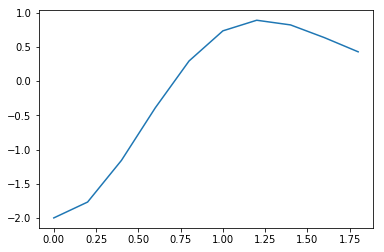

In [5]:
def prob1(x):
    return (4*x**(2) - 2) * math.exp(-x**(2))

prob1v = np.vectorize(prob1)

x = np.arange(0, 2, 0.2) 


plt.plot(x, prob1v(x)) 

plt.show()

|-2.2567| > |0.2893|

m = 2.2567

((2 - a)/12) <= h^2 * m

((2 - 0)/12) h^2 * (2.2567) <= 10^(-6)

(1/6) h^2 * (2.2567) <= 10^(-6)

h^2 * (2.2567)<= (10^(-6) * 6)

h^2 <= (10^(-6) * 6) / (2.2567)

h^2 <= ((10^(-6) * 6) / (2.2567))^(1/2)

h <= 0.001630

n = pi/h

n >= 1927.3574

n >= 1928 (Next whole number)

In [6]:
math.erf(2)

0.9953222650189527

In [7]:
def nerf(x):
    return math.exp(-x**2)

In [8]:
(2/math.sqrt(math.pi)) * (trap(nerf,0, 2, 1928))

0.9953007742647099

### Question 02

f(x) = e^(-x^2)

f'(x) = -2x * e^(-x^2)

f''(x) = (4x^(2) - 2) * e^(-x^2)

f^(3)(x) = (-8x^(3) + 12x) * e^(-x^2)

f^(4)(x) = (16x^(4) - 48x^(2) + 12) * e^(-x^2)

Tried 0 <= x <= 1 because 1 is easy to work with

f^(4)(0) = (2/sqrt(pi))((16(0)^(4) - 48(0)^(2) + 12) * e^(-(0)^2)) = 13.5405

f^(4)(1) = (2/sqrt(pi))((16(2)^(4) - 48(2)^(2) + 12) * e^(-(2)^2)) = 1.5706

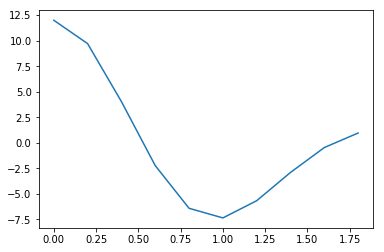

In [9]:
def prob2(x):
    return (16*x**(4) - 48*x**(2) + 12) * math.exp(-x**2)

prob2v = np.vectorize(prob2)

x = np.arange(0, 2, 0.2) 


plt.plot(x, prob2v(x)) 

plt.show()

|13.5405| > |1.5706|

m = 13.5405

((b - a)/90) <= h^4 * m

((2 - 0)/90) h^4 * (13.5405) <= 10^(-6)

(2/90) h^4 <= 10^(-6) / (13.5405)

(1/45) h^4 <= 10^(-6) / (13.5405)

h^4 <= 10^(-6) (45) / (13.5405)

h <= (10^(-6) (45) / (13.5405))^(1/4)

h <= 0.04269

n = pi/h

n >= 73.5908

n >= 74 (Next whole even number)

In [10]:
(2/math.sqrt(math.pi)) * (simpson(nerf,0, 2, 74))

0.9944930847717389

Simpson rule uses less iterations, but is not as accurate as the composite trapezoidal rule. The composite trapezoidal rule is more accurate, but goes through many more iterations (and thus uses more computer resources).

### Question 03

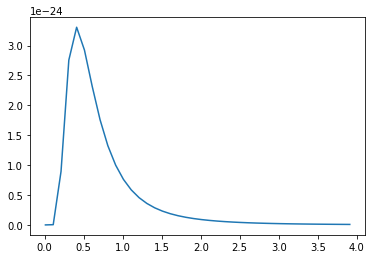

In [11]:
#Part 1
def spec(wavelength):
    return (8 * np.pi * (6.62607004 * 10**(-34) * (299792458))/(wavelength**(5) * (math.exp((2) / wavelength) - 1)))

spec2 = np.vectorize(spec)

x = np.arange(0.01, 4, 0.1) 

plt.plot(x, spec2(x)) 

plt.show()

In [12]:
#Part 2
simpson(spec,0.01,0.4,1000000)

4.973891292665168e-25